# Aula 1

## Colab e Kaggle

Nós vamos usar uma base de dados do Kaggle chamada [Fraud Detection Example](https://www.kaggle.com/gopalmahadevan/fraud-detection-example) e ela tem uma fração de dados do [PaySim](https://github.com/EdgarLopezPhD/PaySim), um simulador de dados financeiros feito exatamente para detecção de fraude.

**Variáveis do dataset**

**step** - mapeia uma unidade de tempo no mundo real. Neste caso, 1 passo é 1 hora de tempo. Total de etapas 744 (simulação de 30 dias).

**type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
(caixa-de-entrada, caixa-de-saida, débito, pagamento e transferência)

**amount** - valor da transação em moeda local.

**nameOrig** - cliente que iniciou a transação

**oldbalanceOrg** - saldo inicial antes da transação

**newbalanceOrig** - novo saldo após a transação

**nameDest** - cliente que é o destinatário da transação

**oldbalanceDest** - destinatário do saldo inicial antes da transação.
Observe que não há informações para clientes que começam com M (Comerciantes).

**newbalanceDest** - novo destinatário do saldo após a transação. Observe que não há informações para clientes que começam com M (Comerciantes).

**isFraud** - São as transações feitas pelos agentes fraudulentos dentro da simulação. Neste conjunto de dados específico, o comportamento fraudulento dos agentes visa lucrar ao assumir o controle das contas dos clientes e tentar esvaziar os fundos transferindo para outra conta e depois sacando do sistema.

**isFlaggedFraud** - O modelo de negócios visa controlar transferências massivas de uma conta para outra e sinaliza tentativas ilegais. Uma tentativa ilegal neste conjunto de dados é uma tentativa de transferir mais de 200.000 em uma única transação.


# Aula 2

## Análise com Pandas

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/fraud_dataset_example.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
101608,10,PAYMENT,7477.02,C513257306,785.00,0.00,M524833426,0.00,0.00,0,0
101609,10,CASH_OUT,282252.35,C210473293,220339.29,0.00,C1172042998,95156.01,91286.97,0,0
101610,10,PAYMENT,17289.01,C807582280,0.00,0.00,M334249577,0.00,0.00,0,0
101611,10,TRANSFER,1347146.45,C1315779140,1605.00,0.00,C1631408038,541639.43,2186953.43,0,0


### Trazendo as colunas de fraude para o começo do dataset

In [3]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [4]:
df = df[['isFraud', 'isFlaggedFraud', 'step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest']]
df

,isFraud,isFlaggedFraud,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,0,0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00
1,0,0,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00
2,1,0,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00
3,1,0,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00
4,0,0,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
101608,0,0,10,PAYMENT,7477.02,C513257306,785.00,0.00,M524833426,0.00,0.00
101609,0,0,10,CASH_OUT,282252.35,C210473293,220339.29,0.00,C1172042998,95156.01,91286.97
101610,0,0,10,PAYMENT,17289.01,C807582280,0.00,0.00,M334249577,0.00,0.00
101611,0,0,10,TRANSFER,1347146.45,C1315779140,1605.00,0.00,C1631408038,541639.43,2186953.43


### Renomeando as colunas

Criando um dicionário
```
colunas = {
    'isFraud': 'fraude',
    'isFlaggedFraud':'super_fraude',
    'step':'tempo',
    'type':'tipo',
    'amount':'valor',
    'nameOrig':'cliente1',
    'oldbalanceOrg':'saldo_inicial_c1',
    'newbalanceOrig':'novo_saldo_c1',
    'nameDest':'cliente2',
    'oldbalanceDest':'saldo_inicial_c2',
    'newbalanceDest':'novo_saldo_c2',
}
```

In [5]:
colunas = {
    'isFraud': 'fraude',
    'isFlaggedFraud':'super_fraude',
    'step':'tempo',
    'type':'tipo',
    'amount':'valor',
    'nameOrig':'cliente1',
    'oldbalanceOrg':'saldo_inicial_c1',
    'newbalanceOrig':'novo_saldo_c1',
    'nameDest':'cliente2',
    'oldbalanceDest':'saldo_inicial_c2',
    'newbalanceDest':'novo_saldo_c2',
}

In [6]:
df = df.rename(columns = colunas)
df.head()

,fraude,super_fraude,tempo,tipo,valor,cliente1,saldo_inicial_c1,novo_saldo_c1,cliente2,saldo_inicial_c2,novo_saldo_c2
0,0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0
1,0,0,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0
2,1,0,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0
3,1,0,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0
4,0,0,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0


### Outras informações do dataset

O método describe() fornece as informações sobre:

**count** - Conta a quantidade de número de valores não vazios. Com esses valores podemos entender melhor o tamanho da amostra.

**mean** - O valor médio, em média aritmética. Como ele faz uma média aritmética nem sempre mostra a realidade da maior parte dos casos do banco de dados.

**std** - O desvio padrão. É a medida de como os dados se dispersam em relação à média, ou seja, o quanto eles estão espalhados.

**min** e **max** - Valores que auxiliam a identificar a amplitude da amostra, entre o valor mínimo e máximo.

**quartis** - Valores que nos mostram de que forma os dados foram distribuídos, por exemplo em 50% é a mediana e metade dos valores são inferiores a X valor, a outra metade é superior àquele valor.

Para saber mais sobre esse método, acesse o artigo [Ampliando a análise com o Describe](https://www.alura.com.br/artigos/ampliando-a-analise-com-describe).


In [7]:
df.describe()

,fraude,super_fraude,tempo,valor,saldo_inicial_c1,novo_saldo_c1,saldo_inicial_c2,novo_saldo_c2
count,101613.000000,101613.0,101613.000000,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05
mean,0.001142,0.0,8.523457,1.740901e+05,9.071753e+05,9.234992e+05,8.810428e+05,1.183998e+06
std,0.033768,0.0,1.820681,3.450199e+05,2.829575e+06,2.867319e+06,2.399949e+06,2.797761e+06
min,0.000000,0.0,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.0,8.000000,1.001659e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000,0.0,9.000000,5.338541e+04,2.019047e+04,0.000000e+00,2.105800e+04,5.178343e+04
75%,0.000000,0.0,10.000000,2.124984e+05,1.947150e+05,2.192178e+05,5.919217e+05,1.063122e+06
max,1.000000,0.0,10.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.400874e+07,3.894623e+07


In [8]:
df.shape

(101613, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   fraude            101613 non-null  int64  
 1   super_fraude      101613 non-null  int64  
 2   tempo             101613 non-null  int64  
 3   tipo              101613 non-null  object 
 4   valor             101613 non-null  float64
 5   cliente1          101613 non-null  object 
 6   saldo_inicial_c1  101613 non-null  float64
 7   novo_saldo_c1     101613 non-null  float64
 8   cliente2          101613 non-null  object 
 9   saldo_inicial_c2  101613 non-null  float64
 10  novo_saldo_c2     101613 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


### Verificando a variável target

In [10]:
df.groupby('fraude')['tempo'].count()

,tempo
fraude,
0,101497
1,116


In [11]:
df.isnull().values.any()

False

## Encoding

### Pandas Profiling

Instalando o Pandas Profiling

```!pip install -U pandas-profiling```

In [12]:
!pip install ydata-profiling

In [13]:
from ydata_profiling import ProfileReport

ProfileReport(df)

Output hidden; open in https://colab.research.google.com to view.

### Aplicando o Encoding

#### **Tipos de encoding**

**Label Encoding** - Renomea as classes com valores numéricos de 1 a **n**, sendo n o número de classes. Pode existir hierarquia entre as classes.

**One-Hot Encoding** - Transforma as variáveis em **n** colunas binárias, sendo n o número de classes. Todas as classes são analisadas de forma igual, quando tiver a ocorrência dela a coluna terá o valor 1 e quando não o valor 0, isso acontece para as demais colunas criadas.



In [14]:
df = pd.get_dummies(df, columns=['tipo'], dtype=int)

In [15]:
df.head()

,fraude,super_fraude,tempo,valor,cliente1,saldo_inicial_c1,novo_saldo_c1,cliente2,saldo_inicial_c2,novo_saldo_c2,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,0,0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,1,0
1,0,0,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,1,0
2,1,0,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,0,0,0,0,1
3,1,0,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,0,1,0,0,0
4,0,0,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,1,0


#### Removendo variáveis

In [16]:
df = df.drop(columns=['cliente1', 'cliente2', 'super_fraude'])
df.head()

,fraude,tempo,valor,saldo_inicial_c1,novo_saldo_c1,saldo_inicial_c2,novo_saldo_c2,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,0,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,0,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


# Aula 3

## Regressão Logística

In [17]:
x = df.drop(columns=['fraude'], axis=1)
y = df['fraude']

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

seed = 42

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=seed)

lr = LogisticRegression(max_iter=1000, random_state=seed)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(f'Acurácia: {metrics.accuracy_score(y_test, y_pred)}')
print(f'Precisão: {metrics.precision_score(y_test, y_pred)}')
print(f'Recall: {metrics.recall_score(y_test, y_pred)}')
print(f'F-1: {metrics.f1_score(y_test, y_pred)}')

Acurácia: 0.9990552668871044
Precisão: 0.3333333333333333
Recall: 0.043478260869565216
F-1: 0.07692307692307693


In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline

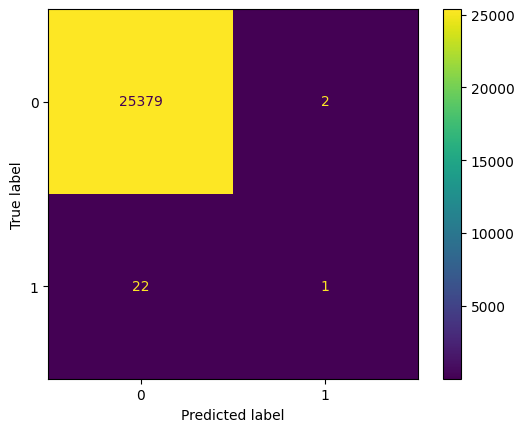

In [20]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### Curva de Roc

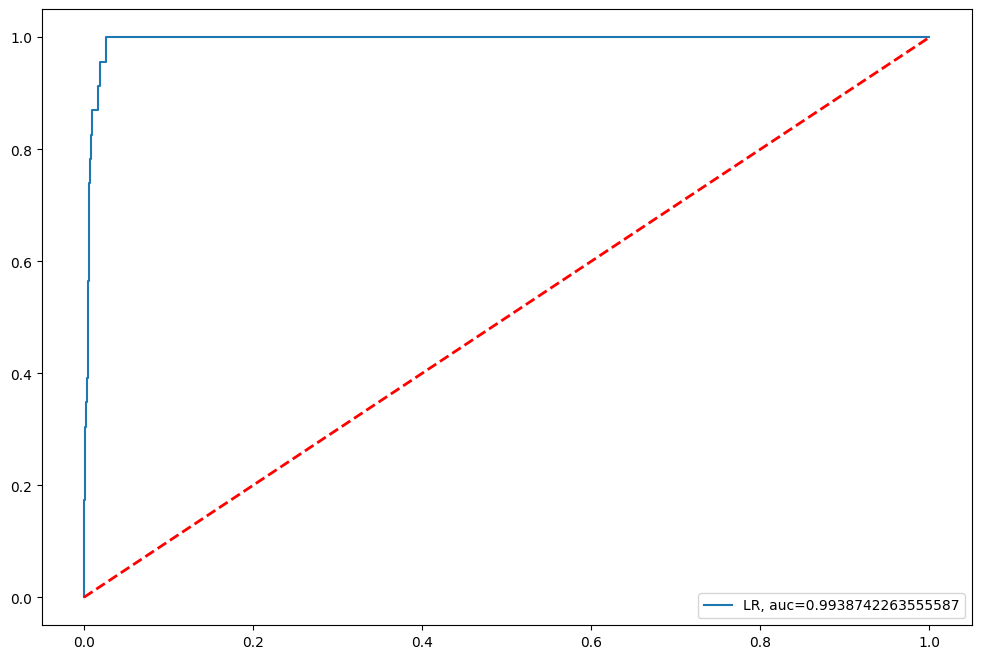

In [21]:
y_pred_proba = lr.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.rcParams['figure.figsize'] = (12, 8)
plt.plot(fpr, tpr, label='LR, auc='+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

## Balanceamento de dados

In [22]:
!pip install -U imbalanced-learn

In [23]:
from imblearn.over_sampling import SMOTE
import numpy as np

In [24]:
smote = SMOTE(random_state=seed)

x = df.drop(columns=['fraude'], axis=1)
y = df['fraude']

x_resampled, y_resampled = smote.fit_resample(x, y)

In [25]:
df_balanced = pd.concat([y_resampled, x_resampled], axis=1)
df_balanced

,fraude,tempo,valor,saldo_inicial_c1,novo_saldo_c1,saldo_inicial_c2,novo_saldo_c2,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,0,1,9839.640000,170136.000000,160296.36,0.000000,0.000000,0,0,0,1,0
1,0,1,1864.280000,21249.000000,19384.72,0.000000,0.000000,0,0,0,1,0
2,1,1,181.000000,181.000000,0.00,0.000000,0.000000,0,0,0,0,1
3,1,1,181.000000,181.000000,0.00,21182.000000,0.000000,0,1,0,0,0
4,0,1,11668.140000,41554.000000,29885.86,0.000000,0.000000,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
202989,1,5,17608.962863,17608.962863,0.00,0.000000,0.000000,0,0,0,0,1
202990,1,7,12116.291013,12116.291013,0.00,0.000000,0.000000,0,0,0,0,1
202991,1,1,231612.880715,231612.880715,0.00,1945.589357,9370.603471,0,0,0,0,0
202992,1,9,547325.144758,547325.144758,0.00,0.000000,0.000000,0,0,0,0,1


In [26]:
df_balanced.groupby('fraude')['tempo'].count()

,tempo
fraude,
0,101497
1,101497


In [27]:
# outro modo para dividir o dataset em x e y
x = df_balanced.iloc[:, 1:].values
y = df_balanced.iloc[:, 0].values

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=seed)

lr = LogisticRegression(max_iter=1000, random_state=seed)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(f'Acurácia: {metrics.accuracy_score(y_test, y_pred)}')
print(f'Precisão: {metrics.precision_score(y_test, y_pred)}')
print(f'Recall: {metrics.recall_score(y_test, y_pred)}')
print(f'F-1: {metrics.f1_score(y_test, y_pred)}')

Acurácia: 0.963526374903939
Precisão: 0.9634218521879809
Recall: 0.96353591160221
F-1: 0.9634788785194247


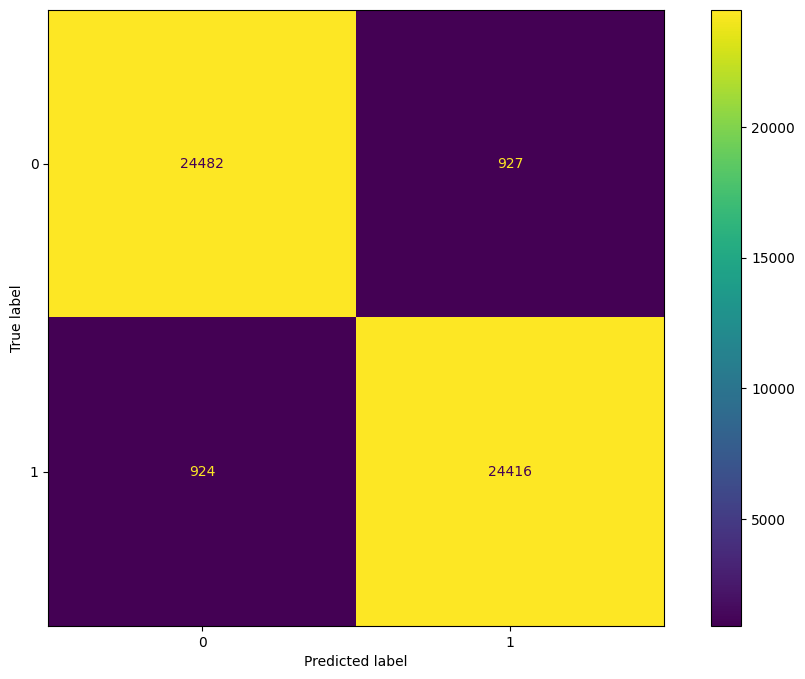

In [29]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

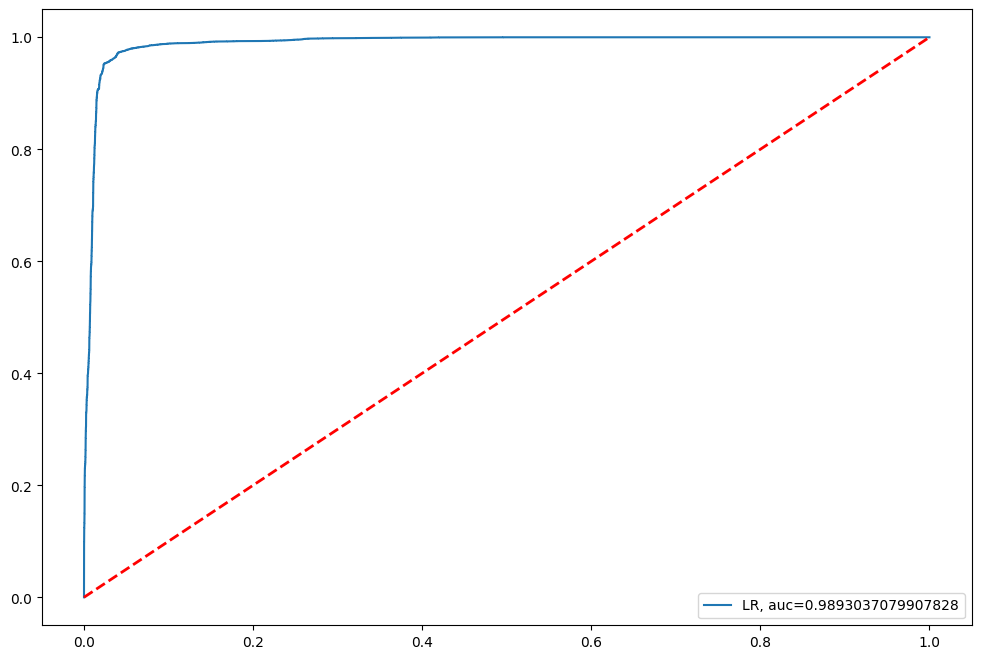

In [30]:
y_pred_proba = lr.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.rcParams['figure.figsize'] = (12, 8)
plt.plot(fpr, tpr, label='LR, auc='+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

## Formulando as hipóteses

In [31]:
ProfileReport(df_balanced)

Output hidden; open in https://colab.research.google.com to view.

**Inserir as hipóteses aqui!** (dê um duplo clique na célula)

- tipo_PAYMENT é o que a pessoa utiliza como padrão e a fraude ocorre por meio do tipo_TRANSFER

- O cliente pode fazer seus pagamentos durante um período do dia, como por exemplo durante a manhã, e a fraude ocorre durante um período diferente, como a madrugada.

- O cliente paga as duas contas no começo do mês e houve uma movimentação no final do mês, sendo uma fraude.

# Aula 4

## Árvore de Decisão

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dt = DecisionTreeClassifier(max_depth=5, random_state=seed)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print(f'Acurácia: {metrics.accuracy_score(y_test, y_pred)}')
print(f'Precisão: {metrics.precision_score(y_test, y_pred)}')
print(f'Recall: {metrics.recall_score(y_test, y_pred)}')
print(f'F-1: {metrics.f1_score(y_test, y_pred)}')

Acurácia: 0.9622849711324362
Precisão: 0.9381639982043992
Recall: 0.9897000789265983
F-1: 0.9632432017206944


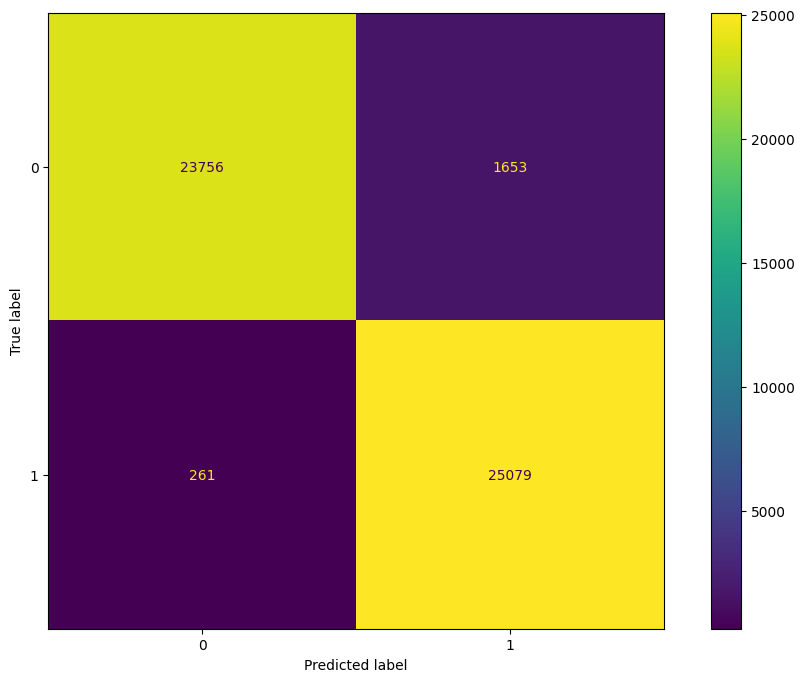

In [34]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

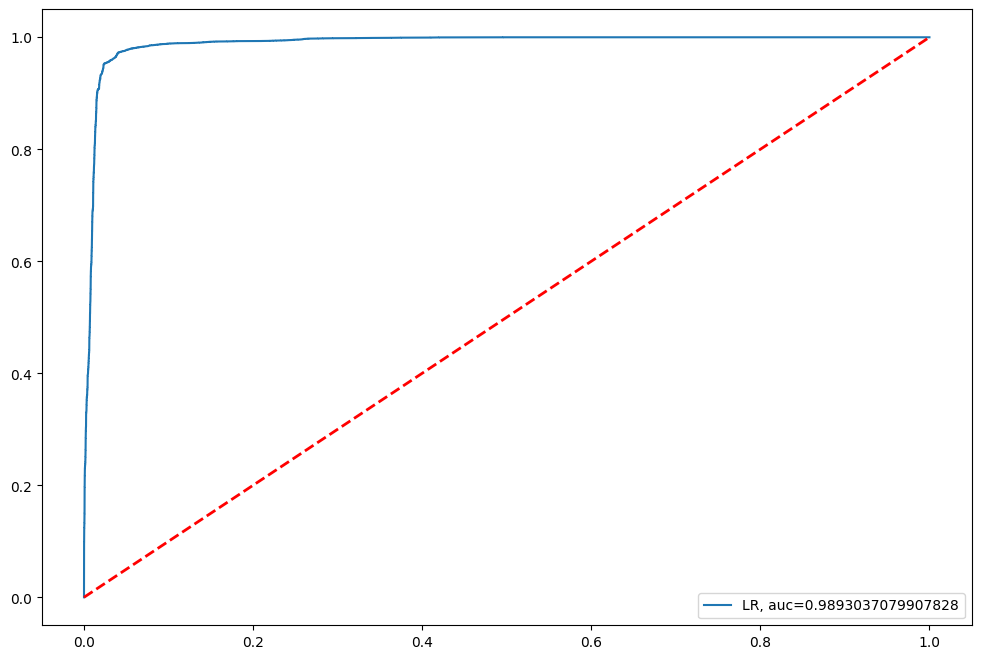

In [35]:
y_pred_proba = lr.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.rcParams['figure.figsize'] = (12, 8)
plt.plot(fpr, tpr, label='LR, auc='+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

## Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rf = RandomForestClassifier(max_depth=5, random_state=seed)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(f'Acurácia: {metrics.accuracy_score(y_test, y_pred)}')
print(f'Precisão: {metrics.precision_score(y_test, y_pred)}')
print(f'Recall: {metrics.recall_score(y_test, y_pred)}')
print(f'F-1: {metrics.f1_score(y_test, y_pred)}')

Acurácia: 0.9723738398786183
Precisão: 0.9705165500432424
Recall: 0.9742699289660616
F-1: 0.9723896175509079


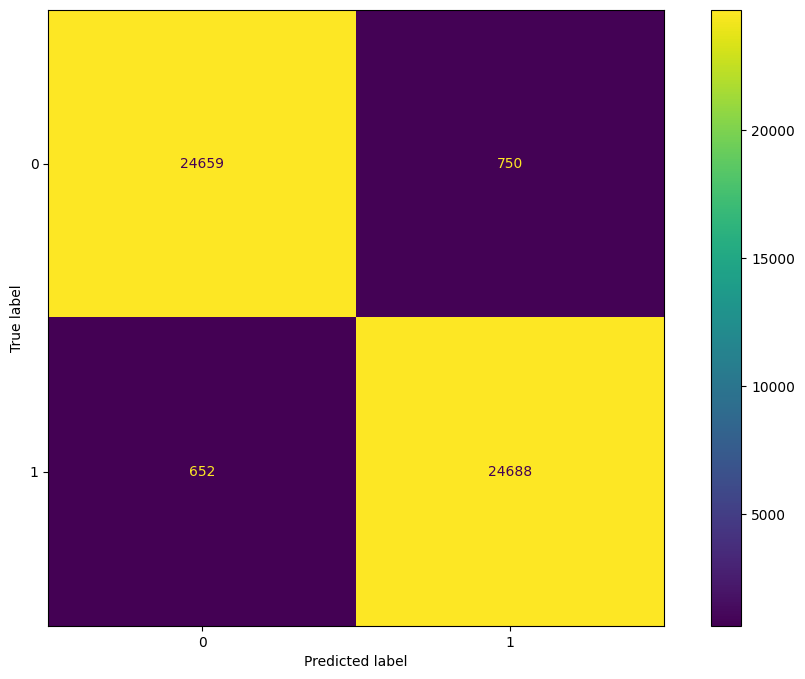

In [38]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

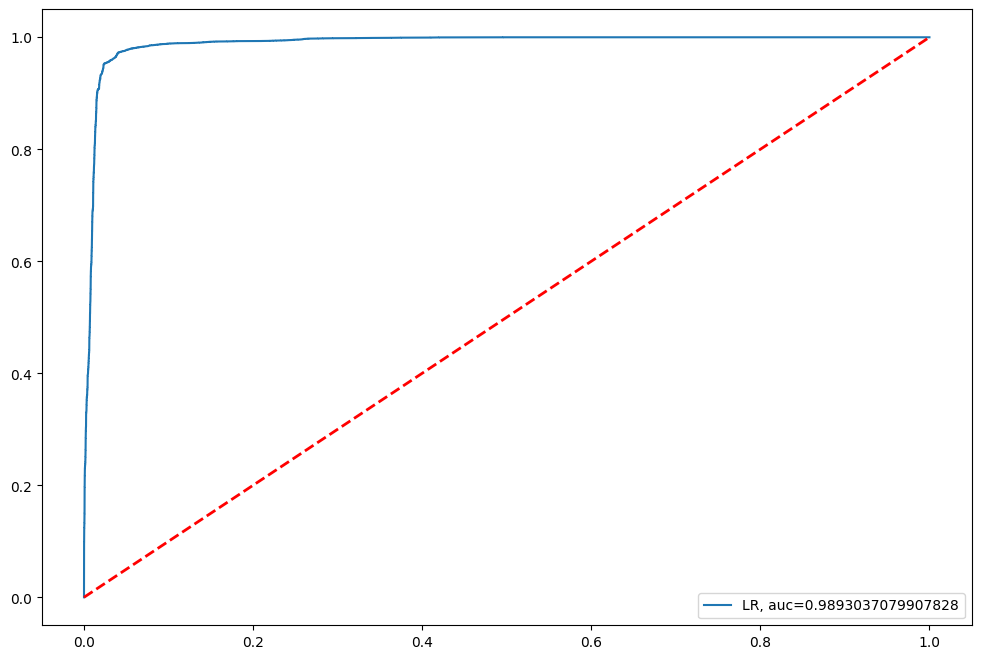

In [39]:
y_pred_proba = lr.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.rcParams['figure.figsize'] = (12, 8)
plt.plot(fpr, tpr, label='LR, auc='+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

## Análise de Métricas

In [40]:
classifiers = [
    LogisticRegression(max_iter=1000, random_state=seed),
    DecisionTreeClassifier(max_depth=5, random_state=seed),
    RandomForestClassifier(max_depth=5, random_state=seed)
]

LogisticRegression
******Resultado******
Acurácia: 0.963526374903939
Precisão: 0.9634218521879809
Recall: 0.96353591160221
F-1: 0.9634788785194247
DecisionTreeClassifier
******Resultado******
Acurácia: 0.9622849711324362
Precisão: 0.9381639982043992
Recall: 0.9897000789265983
F-1: 0.9632432017206944
RandomForestClassifier
******Resultado******
Acurácia: 0.9723738398786183
Precisão: 0.9705165500432424
Recall: 0.9742699289660616
F-1: 0.9723896175509079


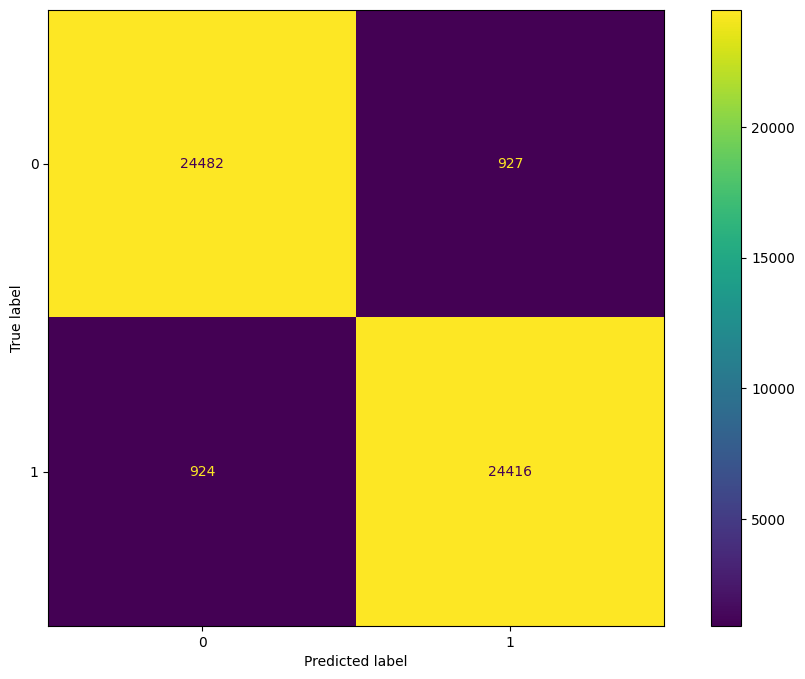

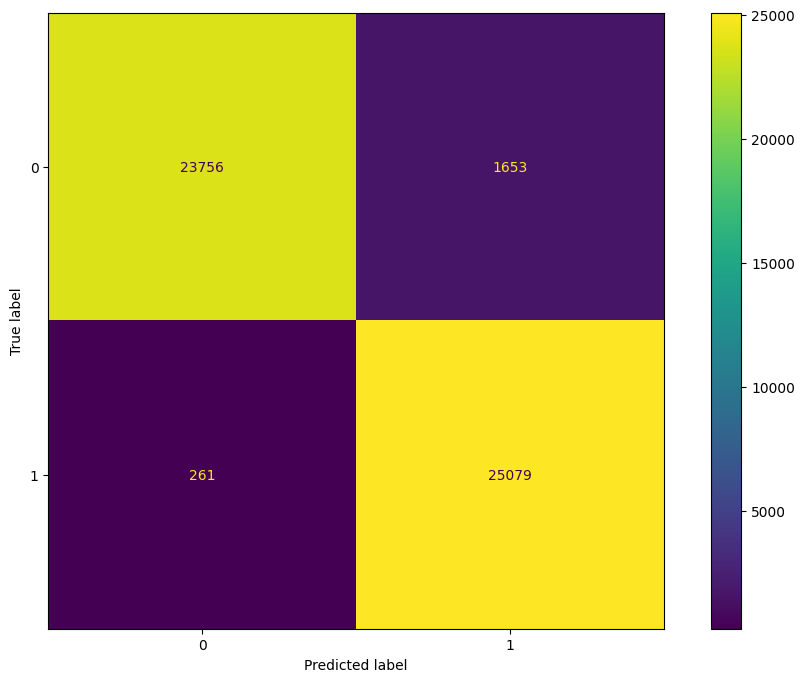

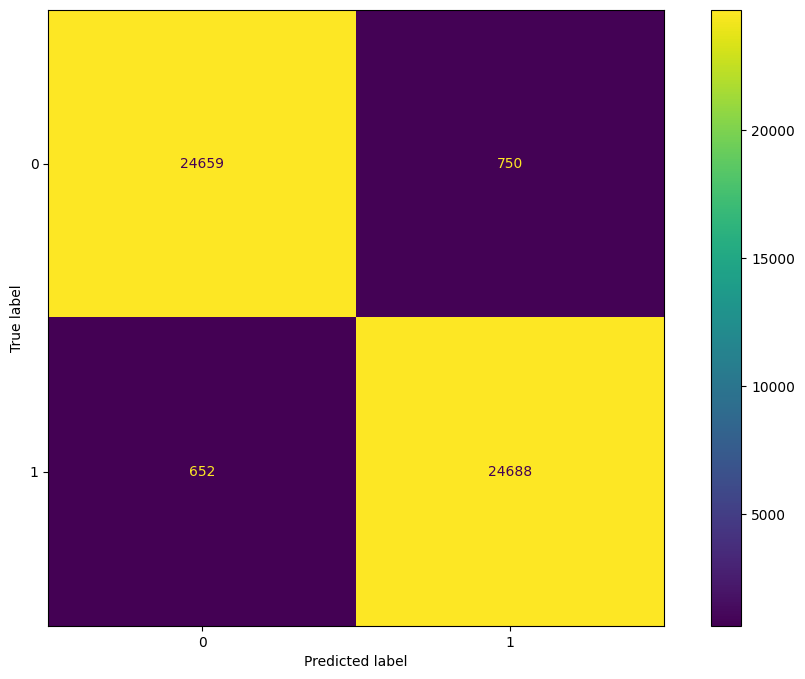

In [41]:
for clf in classifiers:
  clf.fit(X_train, y_train)
  name = clf.__class__.__name__
  print("="*30)
  print(name)
  print('******Resultado******')
  y_pred = clf.predict(X_test)

  print(f'Acurácia: {metrics.accuracy_score(y_test, y_pred)}')
  print(f'Precisão: {metrics.precision_score(y_test, y_pred)}')
  print(f'Recall: {metrics.recall_score(y_test, y_pred)}')
  print(f'F-1: {metrics.f1_score(y_test, y_pred)}')

  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()

# Aula 5

## Melhorando o modelo

In [42]:
n_estimators = np.arange(20, 200, step=20)
criterion = ['gini', 'entropy']
max_features = ['sqrt', 'log2']
max_depth = list(np.arange(2, 10, step=1))
min_samples_split = np.arange(2, 10, step=2)
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [43]:
param_grid = {
    'n_estimators': n_estimators,
    'criterion': criterion,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [44]:
from sklearn.model_selection import RandomizedSearchCV

seed = 70
rforest = RandomForestClassifier(random_state=seed)
random_cv = RandomizedSearchCV(
    rforest, param_grid, n_iter=5, cv=3, n_jobs=-1, scoring='recall', random_state=seed
)

In [45]:
%%time
rcv = random_cv.fit(x, y)

CPU times: user 39.6 s, sys: 678 ms, total: 40.3 s
Wall time: 4min 57s


In [46]:
pd.DataFrame(rcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,49.447089,0.925661,0.541750,0.038501,180,6,4,log2,5,gini,False,"{'n_estimators': 180, 'min_samples_split': 6, ...",0.969555,0.995980,0.971654,0.979063,0.011993,3
1,19.261910,0.655493,0.274096,0.071748,120,4,2,sqrt,2,entropy,False,"{'n_estimators': 120, 'min_samples_split': 4, ...",0.914223,0.935123,0.862674,0.904007,0.030446,5
2,15.420908,0.194446,0.192388,0.008327,80,4,4,log2,3,gini,False,"{'n_estimators': 80, 'min_samples_split': 4, '...",0.928056,0.956137,0.930716,0.938303,0.012657,4
3,46.837071,1.761959,0.716901,0.061413,180,2,2,sqrt,8,gini,True,"{'n_estimators': 180, 'min_samples_split': 2, ...",0.985014,0.999970,0.991960,0.992315,0.006111,2
4,36.628996,1.804985,0.488886,0.154851,100,8,4,log2,9,gini,False,"{'n_estimators': 100, 'min_samples_split': 8, ...",0.992758,0.999468,0.992374,0.994867,0.003257,1


In [47]:
rcv.best_params_

{'n_estimators': 100,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 9,
 'criterion': 'gini',
 'bootstrap': False}

## Resultados Finais

In [48]:
rfn = RandomForestClassifier(**rcv.best_params_, random_state=seed)
rfn.fit(X_train, y_train)
y_pred = rfn.predict(X_test)

print(f'Acurácia: {metrics.accuracy_score(y_test, y_pred)}')
print(f'Precisão: {metrics.precision_score(y_test, y_pred)}')
print(f'Recall: {metrics.recall_score(y_test, y_pred)}')
print(f'F-1: {metrics.f1_score(y_test, y_pred)}')

Acurácia: 0.9925712821927526
Precisão: 0.9900663551768817
Recall: 0.9951065509076559
F-1: 0.9925800547147159


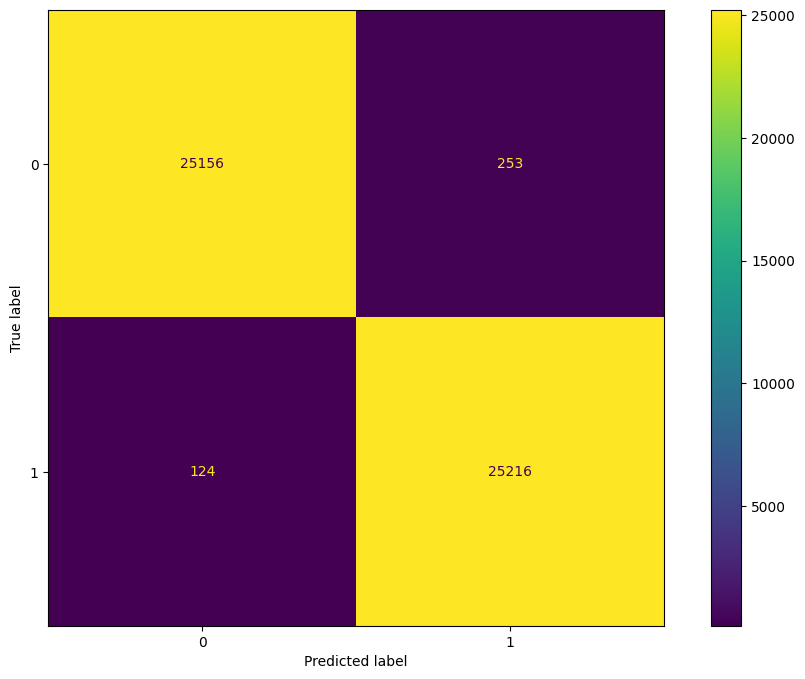

In [49]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Conclusão

**Inserir as soluções para cada hipótese aqui!**

* O(a) cliente tem um certo padrão de movimentação do dinheiro, em horário comercial, e a fraude ocorreu fora deste horário, como por exemplo durante a madrugada.

* Ainda em relação ao tempo, o cliente pode fazer suas principais movimentações em um período inicial do mês e a fraude foi vista em um dia não habitual.
  - Fazer um CAPTCHA para aumentar a segurança em horários não convencionais.
* O(a) cliente utiliza como padrão o pagamento em dinheiro, seja por PIX ou retirada*, e a fraude pode ocorrer por um pagamento por transferência.
  - Solicitar uma verificação de informação adicional do banco, como uma pergunta de segurança, para movimentações de transferência.

# Fazendo predições com novos dados

In [50]:
import joblib

In [51]:
joblib.dump(rfn, 'modelo_final.pkl')

['modelo_final.pkl']

In [65]:
df.columns

Index(['fraude', 'tempo', 'valor', 'saldo_inicial_c1', 'novo_saldo_c1',
       'saldo_inicial_c2', 'novo_saldo_c2', 'tipo_CASH_IN', 'tipo_CASH_OUT',
       'tipo_DEBIT', 'tipo_PAYMENT', 'tipo_TRANSFER'],
      dtype='object')

In [82]:
# Definição das colunas do DataFrame
colunas_df = [
    'step', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
    'oldbalanceDest', 'newbalanceDest', 'type_CASH_IN',
    'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'
]

# Criando um DataFrame vazio com as colunas especificadas
df_new = pd.DataFrame(columns=colunas_df)

# Nova transação
nova_transacao = {
    'step': 1,
    'amount': 9839.640000,
    'oldbalanceOrg': 170136.000000,
    'newbalanceOrig': 160296.36,
    'oldbalanceDest': 0.000000,
    'newbalanceDest': 0.000000,
    'type': 'PAYMENT'
}

# Mapeamento one-hot encoding manual
type_cols = ['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']

# Criando o dicionário para inserção no DataFrame
nova_linha = {
    'step': nova_transacao['step'],
    'amount': nova_transacao['amount'],
    'oldbalanceOrg': nova_transacao['oldbalanceOrg'],
    'newbalanceOrig': nova_transacao['newbalanceOrig'],
    'oldbalanceDest': nova_transacao['oldbalanceDest'],
    'newbalanceDest': nova_transacao['newbalanceDest'],
}

# Preenchendo as colunas one-hot encoding
for col in type_cols:
    nova_linha[col] = 1 if col == f"type_{nova_transacao['type']}" else 0

# Criando o dataframe com a linha nova
df_new = pd.DataFrame(nova_linha, index=[0])

# Exibindo o DataFrame atualizado
df_new

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0


In [85]:
def nova_transacao(n_transacao):
  cols_df = [
      'step', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
      'oldbalanceDest', 'newbalanceDest', 'type_CASH_IN',
      'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'
  ]

  new_df = pd.DataFrame(columns=cols_df)

  # encoding manual
  type_cols = ['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']

  new_line = {
      'step': n_transacao['step'],
      'amount': n_transacao['amount'],
      'oldbalanceOrg': n_transacao['oldbalanceOrg'],
      'newbalanceOrig': n_transacao['newbalanceOrig'],
      'oldbalanceDest': n_transacao['oldbalanceDest'],
      'newbalanceDest': n_transacao['newbalanceDest']
  }

  for col in type_cols:
    new_line[col] = 1 if col == f"type_{n_transacao['type']}" else 0

  new_df = pd.DataFrame(new_line, index=[0])

  result = rfn.predict(new_df.to_numpy())

  return result

In [87]:
nova_movimentacao = {
    'step': 1,
    'amount': 9839.64,
    'oldbalanceOrg': 170136.00,
    'newbalanceOrig': 160296.36,
    'oldbalanceDest': 0.00,
    'newbalanceDest': 0.00,
    'type': 'PAYMENT'
}

nova_transacao(nova_movimentacao)

array([0])